<a href="https://colab.research.google.com/github/mskang222/NLP_2023/blob/main/12%EC%9B%94_8%EC%9D%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MNIST_feature_map(2)

In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, Input
from keras.models import Model
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [3]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

gray_scale = 255
X_train /= gray_scale
X_test /= gray_scale

In [5]:
num_classes = 10  #one hot encoding
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

In [6]:
def model():

    inputs = Input(shape=(28,28,1))      #inputs:변수, Input:함수
    x = Conv2D(24,kernel_size=(3,3),padding='same',activation="relu")(inputs)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Conv2D(48, (3, 3), padding='same',activation='relu')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Conv2D(64, (3, 3), padding='same',activation='relu')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Flatten()(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.25)(x)
    output = Dense(num_classes,activation="softmax")(x)

    model = Model(inputs,output)

    model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

    return model

In [7]:
model_s=model()
model_s.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 24)        240       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 24)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 48)        10416     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 48)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 64)          27712 

학습하기

In [8]:
epochs = 30     #30번 학습
batch_size=64

model = model()
history = model.fit(X_train,y_train,
         epochs=epochs,
         batch_size=batch_size,
         validation_split=0.2)

Epoch 1/30
750/750 [==============================] - 16s 5ms/step - loss: 0.2385 - accuracy: 0.9259 - val_loss: 0.0630 - val_accuracy: 0.9812
Epoch 2/30
750/750 [==============================] - 4s 6ms/step - loss: 0.0667 - accuracy: 0.9795 - val_loss: 0.0405 - val_accuracy: 0.9876
Epoch 3/30
750/750 [==============================] - 4s 5ms/step - loss: 0.0479 - accuracy: 0.9861 - val_loss: 0.0457 - val_accuracy: 0.9855
Epoch 4/30
750/750 [==============================] - 3s 5ms/step - loss: 0.0366 - accuracy: 0.9881 - val_loss: 0.0314 - val_accuracy: 0.9903
Epoch 5/30
750/750 [==============================] - 4s 5ms/step - loss: 0.0293 - accuracy: 0.9911 - val_loss: 0.0394 - val_accuracy: 0.9888
Epoch 6/30
750/750 [==============================] - 5s 6ms/step - loss: 0.0273 - accuracy: 0.9911 - val_loss: 0.0327 - val_accuracy: 0.9907
Epoch 7/30
750/750 [==============================] - 3s 5ms/step - loss: 0.0211 - accuracy: 0.9929 - val_loss: 0.0348 - val_accuracy: 0.9902
Epoch

학습된 모델 평가하기

In [ ]:
X_test.shape  #문제지

In [10]:
model.predict(X_test[50].reshape(1,28,28,1))

1/1 [==============================] - 0s 172ms/step


array([[5.8272972e-13, 2.1305079e-20, 3.3934870e-17, 2.7191359e-20,
        1.7769646e-20, 5.8857677e-15, 1.0000000e+00, 8.7390581e-27,
        1.5641176e-17, 1.6896349e-24]], dtype=float32)

In [11]:
model.predict(X_test[50].reshape(1,28,28,1)).shape

1/1 [==============================] - 0s 19ms/step


(1, 10)

1/1 [==============================] - ETA: 0s

/usr/local/lib/python3.10/dist-packages/matplotlib/text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


1/1 [==============================] - 0s 20ms/step


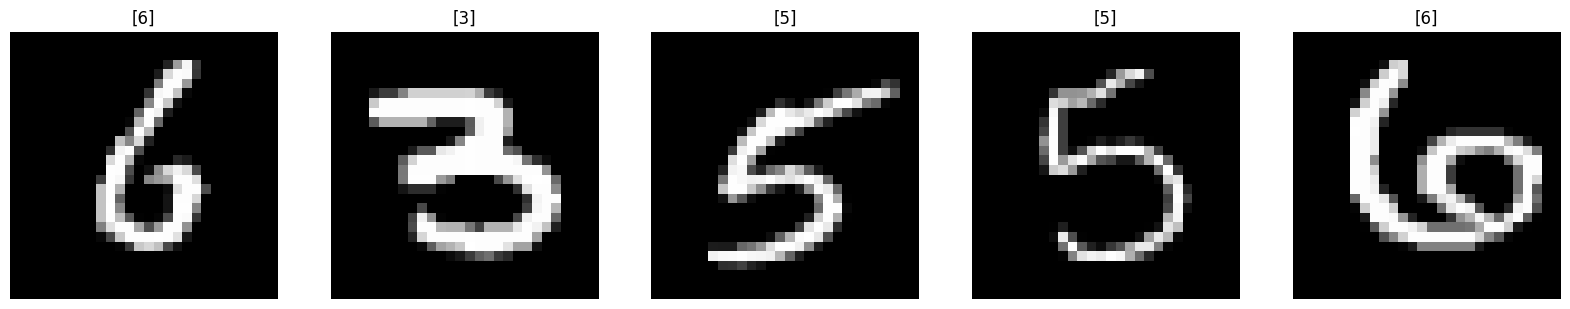

In [12]:
figure = plt.figure(figsize=(20,20))
for i in range(5):
    figure.add_subplot(1,5,i+1)  # 1행 5열 그림에 , 그림순서 (순서는 1,2,3 이므로 i+1)
    plt.imshow(X_test[i+50,:,:],cmap="gray")
    plt.axis("off")
    #print(np.squeeze(np.argmax(model.predict(X_test[i+50].reshape(1,28,28,1)),axis=1),axis=0),end="\t")
    plt.title(np.argmax(model.predict(X_test[i+50].reshape(1,28,28,1)),axis=1))

1/1 [==============================] - 0s 111ms/step


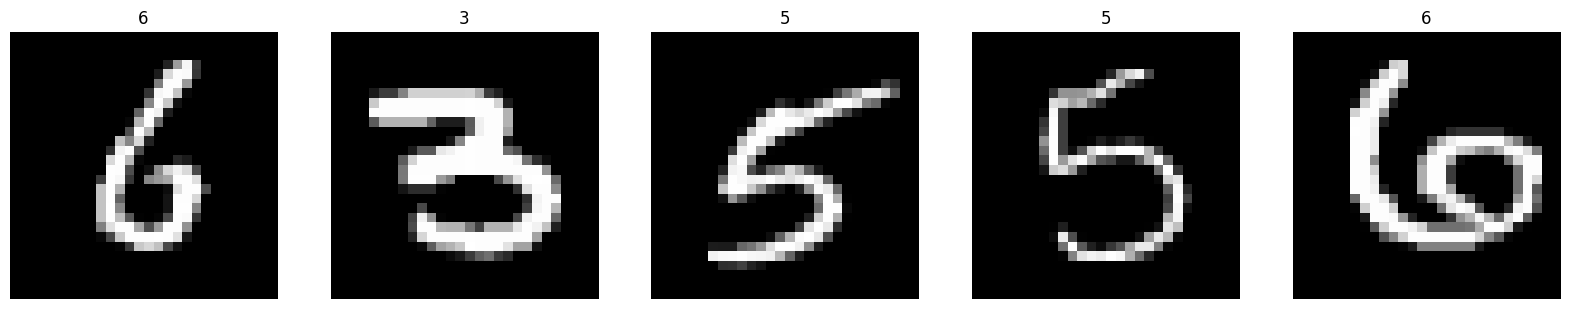

In [13]:
figure = plt.figure(figsize=(20,20))
for i in range(5):
    figure.add_subplot(1,5,i+1)  # 1행 5열 그림에 , 그림순서 (순서는 1,2,3 이므로 i+1)
    plt.imshow(X_test[i+50,:,:],cmap="gray")
    plt.axis("off")
    #print(np.squeeze(np.argmax(model.predict(X_test[i+50].reshape(1,28,28,1)),axis=1),axis=0),end="\t")
    plt.title(np.squeeze(np.argmax(model.predict(X_test[i+50].reshape(1,28,28,1)),axis=1)))

In [14]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 28, 28, 24)        240       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 14, 14, 24)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 48)        10416     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 7, 7, 48)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 7, 7, 64)          2771

In [15]:
layer_outputs = [layer.output for layer in model.layers[1:7]] # 1~6까지 input후 flatten 전까지
activation_model = Model(inputs=model.input,outputs=layer_outputs)  # 6개 결과를 내어놓는데, 각 layer의 결과를 볼수 있음

In [17]:
layer_outputs[0]

<KerasTensor: shape=(None, 28, 28, 24) dtype=float32 (created by layer 'conv2d_3')>

(-0.5, 27.5, 27.5, -0.5)

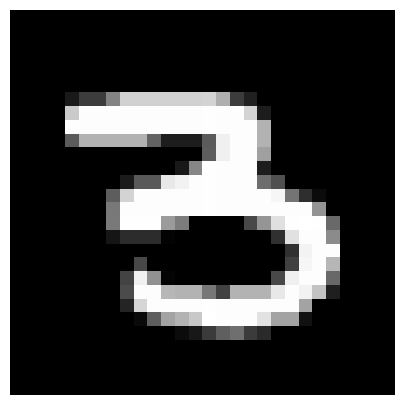

In [18]:
img =X_test[51].reshape(1,28,28,1)
fig = plt.figure(figsize=(5,5))
plt.imshow(img[0,:,:,0],cmap="gray")
plt.axis('off')